# `boa_utils` examples

First, import `boa_utils` - it's a single module:

In [1]:
import boa_utils

Now there are two things you can do, instantiate the `BOA` class and make queries/download data, or use some of the convenience functions.

In [2]:
boa = boa_utils.BOA?

Init signature:
boa_utils.BOA(
    url='https://boa.esac.esa.int/boa-tap/tap',
    dl_url='https://boa.esac.esa.int/boa-sl',
    config_file='/home/mbentley/.config/boa_utils.yml',
)
Docstring:      <no docstring>
Init docstring:
The BOA URL instance can be specified, along with a
YAML config file containing a user section with login and
password entries. If neither of these are provided, the
default values are used
File:           ~/Dropbox/work/bepi/software/boa_utils/boa_utils.py
Type:           type
Subclasses:     


In [ ]:
boa = boa_utils.BOA

In [2]:
boa = boa_utils.BOA()

As you can see the class needs three inputs:
- `url` (the URL of the BOA instance, by default this points to the operational server)
- `dl_url` (the URL of the download endpoints, by default this points to the operational server)
- `config_file` - a YAML configuration file, specifying the username and password
  - the default file looked for is `boa_utils.yml` and it will be looked for in these locations:
    - `$APPDATA`
    - `$XDG_CONFIG_HOME`
    - `$HOME`
    - `$HOME/.config`

In [4]:
boa = boa_utils.BOA()

The main functions available are:
- `get_tables`
- `get_columns`
- `query`
- `query_packets`
- `retrieve_data`

And we will demonstrate each now

# Meta-data

### `get_tables`

This simply queries the `/tables/` TAP endpoint and returns all of the tables available for query:

In [5]:
boa.get_tables?

Signature: boa.get_tables()
Docstring: Lists the available tables for making meta-data queries
File:      ~/Dropbox/work/bepi/software/boa_utils/boa_utils.py
Type:      method


In [6]:
tables = boa.get_tables()

In [7]:
len(tables)

42

In [8]:
tables.head()

,schema,table
0,public,news
1,boa,telemetry_packet
2,boa,mib
3,boa,subsystem
4,boa,subsystem_spid


In [9]:
tables.schema.unique()

array(['public', 'boa', 'tap_schema'], dtype=object)

Most of the interesting stuff is in the `boa` schema. We can use the next function to find out more about these tables

In [10]:
tables[tables.schema=='boa'].table.to_list()

['telemetry_packet',
 'mib',
 'subsystem',
 'subsystem_spid',
 'signed_int_param_value',
 'u_small_int_param_value',
 'telemetry_packet_data',
 'instrument_host',
 'tm_gap_report',
 'signed_small_int_param_value',
 'u_medium_int_param_value',
 'data_item',
 'kaband_file',
 'telemetry_parameter',
 'orbit_file',
 'news',
 'signed_medium_int_param_value',
 'subsystem_apid',
 'telecommand_history_file',
 'telemetry_packet_subsystem',
 'double_param_value',
 'repository_file',
 'archive_item',
 'data_item_repository_file',
 'signed_tiny_int_param_value',
 'sub_unit',
 'float_param_value',
 'attitude_file',
 'bit_param_value',
 'out_of_limits',
 'string_param_value',
 'contents',
 'rapid_file',
 'telemetry_packet_count',
 'u_int_param_value',
 'u_tiny_int_param_value']

Let's look at the telemetry_packet table:

### `get_columns`

In [11]:
boa.get_columns('boa','telemetry_packet')

,name,dataType
0,id,BIGINT
1,item_id,VARCHAR
2,telemetry_packet_spid,INTEGER
3,source_packet_application_id,INTEGER
4,source_packet_service_type,INTEGER
5,source_packet_service_subtype,INTEGER
6,pi1_val,INTEGER
7,subsystem_id,VARCHAR
8,sub_unit_id,VARCHAR
9,source_packet_sequence_counter,INTEGER


So this tells us what is available for query!

### `query`

In [12]:
boa.query?

Signature: boa.query(query, maxrows=5000)
Docstring:
Makes a simple TAP query to the BOA server and converts the response
to a pandas DataFrame. By default this makes a synchronous query and
the number of results can be changed by setting maxrows (default 5k)
File:      ~/Dropbox/work/bepi/software/boa_utils/boa_utils.py
Type:      method


Let's start by simply grabbing a few rows:

In [13]:
tm = boa.query('select top 10 * from boa.telemetry_packet')

In [14]:
tm

,id,item_id,telemetry_packet_spid,source_packet_application_id,source_packet_service_type,source_packet_service_subtype,pi1_val,subsystem_id,sub_unit_id,source_packet_sequence_counter,...,spacecraft_clock_count,rf_band,ground_station_id,mib_version,inactive,ingested_time,bscs_ingestion_time,proprietary_end_date,retrieval_url,telemetry_packet_oid
0,1,TM_10002_1_0608631848.08407_00008,10002,231,5,4,11100,OBC,OTHER,8,...,0608631848.08407,X_BAND,MALARGUE,R12_S12,False,2018-12-05 20:20:39.683,2018-12-04 08:27:29.388,2018-12-05,http://boa.esac.esa.int/boa-sl/retrieve-data?t...,34156350
1,2,TM_10005_1_0000000000.00800_00000,10005,231,5,3,26385,OBC,OTHER,0,...,0000000000.00800,X_BAND,NEW_NORCIA,R15_S15,False,2019-07-19 17:16:00.74,2019-07-17 15:55:54.818,2019-07-19,http://boa.esac.esa.int/boa-sl/retrieve-data?t...,169292278
2,3,TM_10005_1_0000000000.54016_00000,10005,231,5,3,26385,OBC,OTHER,0,...,0000000000.54016,X_BAND,NDIU_IFMS,R12_S12,False,2018-12-05 20:20:39.738,2018-11-29 12:36:24.321,2018-12-05,http://boa.esac.esa.int/boa-sl/retrieve-data?t...,34156351
3,4,TM_10005_1_0000000000.54495_00000,10005,231,5,3,26385,OBC,OTHER,0,...,0000000000.54495,X_BAND,MALARGUE,R12_S12,False,2018-12-05 20:20:39.757,2018-12-01 09:02:34.148,2018-12-05,http://boa.esac.esa.int/boa-sl/retrieve-data?t...,34156353
4,5,TM_10005_1_0000000000.54522_00000,10005,231,5,3,26385,OBC,OTHER,0,...,0000000000.54522,X_BAND,CEBREROS,R12_S12,False,2018-12-05 20:20:39.749,2018-11-29 13:19:01.853,2018-12-05,http://boa.esac.esa.int/boa-sl/retrieve-data?t...,34156352
5,6,TM_10005_1_0000000000.54926_00000,10005,231,5,3,26385,OBC,OTHER,0,...,0000000000.54926,X_BAND,NEW_NORCIA,R12_S12,False,2019-02-24 02:05:15.77,2019-02-14 21:57:28.422,2019-02-24,http://boa.esac.esa.int/boa-sl/retrieve-data?t...,134974463
6,7,TM_10005_20200617T060237503_00000,10005,231,5,3,26385,OBC,OTHER,0,...,0000000000.51632,X_BAND,NEW_NORCIA,R17_S17,False,2020-06-17 12:43:13.302,2020-06-17 06:06:35.041,2020-06-17,http://boa.esac.esa.int/boa-sl/retrieve-data?t...,299773733
7,8,TM_10008_1_0604721680.00217_00009,10008,231,5,3,26387,OBC,OTHER,9,...,0604721680.00217,X_BAND,NEW_NORCIA,R12_S12,False,2018-12-05 20:20:39.765,2018-11-29 12:42:25.576,2018-12-05,http://boa.esac.esa.int/boa-sl/retrieve-data?t...,34156354
8,9,TM_10009_1_0604721687.32994_00010,10009,231,5,3,26388,OBC,OTHER,10,...,0604721687.32994,X_BAND,NEW_NORCIA,R12_S12,False,2018-12-05 20:20:39.776,2018-11-29 12:42:25.613,2018-12-05,http://boa.esac.esa.int/boa-sl/retrieve-data?t...,34156355
9,10,TM_10010_1_0604721919.00219_00011,10010,231,5,3,26389,OBC,OTHER,11,...,0604721919.00219,X_BAND,NEW_NORCIA,R12_S12,False,2018-12-05 20:20:39.783,2018-11-29 12:42:25.638,2018-12-05,http://boa.esac.esa.int/boa-sl/retrieve-data?t...,34156356


There is a lot of information in this table. Perhaps we only need a few fields, and are only interested in one subsystem.

Let's check which subsystems are available - there is a separate table for that:

In [15]:
boa.query('select distinct subsystem_id from subsystem')

,subsystem_id
0,BELA
1,BERM
2,FCE
3,IMU
4,ISA
5,KaT
6,MCAM
7,MERTIS
8,MGNS
9,MIXS


So let's see how many packets MPO-MAG has generated and are archived in BOA

In [16]:
boa.query("select count(*) from boa.telemetry_packet where subsystem_id='MPO-MAG'")

17626874

Note that if the query is single-valued, a single value is also returned (NOT a pandas dataframe)

Since telemetry packets are a commonly used product, there is a convenience function also:

In [17]:
boa.query_packets?

Signature:
boa.query_packets(
    start_time=None,
    stop_time=None,
    subsys=None,
    spid=None,
    apid=None,
    pkt_type=None,
    pkt_subtype=None,
    maxrows=5000,
    reduced=True,
)
Docstring:
Queries the telemetry packet table in the BOA. By default all packets are
queried for the last day. If stop time is not given
File:      ~/Dropbox/work/bepi/software/boa_utils/boa_utils.py
Type:      method


In [18]:
tm = boa.query_packets(start_time='2020-01-01', stop_time='2020-02-01', subsys='SIXS', reduced=True)

INFO 2021-02-19 18:23:52 (boa_utils): 5000 matching telemetry packets found
WARNING 2021-02-19 18:23:52 (boa_utils): number of packets returned is limited by query - increase max_rows to see more


Here note the warning, that the maximum number of rows has been hit. You can increase this and try again (although not arbitrarily!), or you can narrow your query. Let's look for TM(5) packets (events):

In [19]:
tm = boa.query_packets(start_time='2020-01-01', stop_time='2020-02-01', subsys='SIXS', 
                        reduced=True, pkt_type=5)

INFO 2021-02-19 18:23:55 (boa_utils): 422 matching telemetry packets found


In [20]:
tm.head()

,id,telemetry_packet_spid,source_packet_application_id,source_packet_service_type,source_packet_service_subtype,pi1_val,subsystem_id,sub_unit_id,source_packet_sequence_counter,source_packet_length,earth_reception_time,on_board_time,spacecraft_clock_count,rf_band
0,225824102,48510,1287,5,1,50000,SIXS,OTHER,0,20,2020-02-01 15:32:11.956,2020-01-31 16:03:23.583,0645206602.10289,X_BAND
1,225824103,48510,1287,5,1,50000,SIXS,OTHER,1,20,2020-02-01 15:32:11.956,2020-01-31 16:04:26.783,0645206665.23396,X_BAND
2,225824104,48510,1287,5,1,50000,SIXS,OTHER,2,20,2020-02-01 15:32:11.959,2020-01-31 23:50:11.923,0645234610.32636,X_BAND
3,225825089,48610,1303,5,1,51000,SIXS,OTHER,0,20,2020-01-09 16:04:52.113,2020-01-09 16:02:27.358,0643305745.60423,X_BAND
4,225825090,48610,1303,5,1,51000,SIXS,OTHER,1,20,2020-01-09 16:05:11.077,2020-01-09 16:02:46.458,0643305765.01442,X_BAND


So here we were querying events - there is also a shortcut for this at the module level - it assumes the default URL and configuration file path etc.

In [21]:
events = boa_utils.get_events(instr='SIXS', start_time='2020-01-01', stop_time='2020-02-01')

INFO 2021-02-19 18:23:58 (boa_utils): 422 matching telemetry packets found


## Data retrieval

BOA TAP also has a download endpoint where you can retrieve a sub-set of data stored in BOA - basically this corresponds to anything file-based (e.g. TCH, orbit files etc.) and telemetry packets.

### retrieve_data

In [22]:
boa.retrieve_data?

Signature: boa.retrieve_data(query, binary=True, dl_path='.', extract=True)
Docstring:
Retrieves data files from BOA - this can be any auxiliary file, or it
can be telemetry packets. If the query contains telemetry_packet, the
latter is assumed. In this case the binary boolean flag indicates if
either GDDS binary (binary=True) or XML (binary=False) packets should
be retrieved. Downloaded files are placed into dl_path. If 
extract=True then the resulting tarballs will be unpacked and the
end filename(s) returned
File:      ~/Dropbox/work/bepi/software/boa_utils/boa_utils.py
Type:      method


Let's look at TCH files in this example. First we will make a meta-data query, to check what the result would be, and then pass the same query to the download endpoint.

In [23]:
boa.query('select * from boa.telecommand_history_file')

,data_item_oid,item_id,generation_datetime,inactive,proprietary_end_date,ingested_time,data_item_type,file_description,retrieval_url,file_name,file_size,start_time,end_time,bscs_ingestion_time_ascii,bscs_ingestion_time_xml,repository_file_oid
0,126922,TCH_20181020T000000_20181021T000000,2020-03-24 22:37:25.297,False,2020-03-24,2020-03-24 22:38:08.622,TCH,TC History description,http://boa.esac.esa.int/boa-sl/retrieve-data?d...,edds_tch_response_xml_20181020T000000_20181021...,5056662,2018-10-20 00:00:00.0,2018-10-21 00:00:00.0,2020-03-24 16:22:43.0,2020-03-24 16:22:26.0,214285
1,126922,TCH_20181020T000000_20181021T000000,2020-03-24 22:37:25.297,False,2020-03-24,2020-03-24 22:38:08.622,TCH,TC History description,http://boa.esac.esa.int/boa-sl/retrieve-data?d...,edds_tch_response_txt_20181020T000000_20181021...,481299,2018-10-20 00:00:00.0,2018-10-21 00:00:00.0,2020-03-24 16:22:43.0,2020-03-24 16:22:26.0,214286
2,126923,TCH_20181021T000000_20181022T000000,2020-03-24 22:37:25.848,False,2020-03-24,2020-03-24 22:38:08.759,TCH,TC History description,http://boa.esac.esa.int/boa-sl/retrieve-data?d...,edds_tch_response_xml_20181021T000000_20181022...,5325613,2018-10-21 00:00:00.0,2018-10-22 00:00:00.0,2020-03-24 16:22:43.0,2020-03-24 16:22:28.0,214287
3,126923,TCH_20181021T000000_20181022T000000,2020-03-24 22:37:25.848,False,2020-03-24,2020-03-24 22:38:08.759,TCH,TC History description,http://boa.esac.esa.int/boa-sl/retrieve-data?d...,edds_tch_response_txt_20181021T000000_20181022...,516124,2018-10-21 00:00:00.0,2018-10-22 00:00:00.0,2020-03-24 16:22:43.0,2020-03-24 16:22:28.0,214288
4,126924,TCH_20181022T000000_20181023T000000,2020-03-24 22:37:26.06,False,2020-03-24,2020-03-24 22:38:09.003,TCH,TC History description,http://boa.esac.esa.int/boa-sl/retrieve-data?d...,edds_tch_response_xml_20181022T000000_20181023...,9847916,2018-10-22 00:00:00.0,2018-10-23 00:00:00.0,2020-03-24 16:22:43.0,2020-03-24 16:22:29.0,214289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,307192,TCH_20210228T000000_20210301T000000,2021-02-19 06:13:18.863,False,2021-02-19,2021-02-19 06:13:46.297,TCH,TC History description,http://boa.esac.esa.int/boa-sl/retrieve-data?d...,edds_tch_response_txt_20210228T000000_20210301...,154465,2021-02-28 00:00:00.0,2021-03-01 00:00:00.0,2021-02-19 06:07:57.0,2021-02-19 06:07:07.0,313947
1708,307193,TCH_20210301T000000_20210302T000000,2021-02-19 06:13:18.998,False,2021-02-19,2021-02-19 06:13:46.445,TCH,TC History description,http://boa.esac.esa.int/boa-sl/retrieve-data?d...,edds_tch_response_txt_20210301T000000_20210302...,129205,2021-03-01 00:00:00.0,2021-03-02 00:00:00.0,2021-02-19 06:10:07.0,2021-02-19 06:09:07.0,313949
1709,307193,TCH_20210301T000000_20210302T000000,2021-02-19 06:13:18.998,False,2021-02-19,2021-02-19 06:13:46.445,TCH,TC History description,http://boa.esac.esa.int/boa-sl/retrieve-data?d...,edds_tch_response_xml_20210301T000000_20210302...,1189741,2021-03-01 00:00:00.0,2021-03-02 00:00:00.0,2021-02-19 06:10:07.0,2021-02-19 06:09:07.0,313948
1710,307706,TCH_20210302T000000_20210303T000000,2021-02-19 06:13:19.136,False,2021-02-19,2021-02-19 06:13:46.59,TCH,TC History description,http://boa.esac.esa.int/boa-sl/retrieve-data?d...,edds_tch_response_xml_20210302T000000_20210303...,828629,2021-03-02 00:00:00.0,2021-03-03 00:00:00.0,2021-02-19 06:12:07.0,2021-02-19 06:11:07.0,313950


There are a fair few files! Let's grab the first:

In [24]:
file = boa.retrieve_data('select top 1 * from boa.telecommand_history_file', dl_path='/tmp')

INFO 2021-02-19 18:24:01 (boa_utils): retrieved file 303597.tar.gz
INFO 2021-02-19 18:24:01 (boa_utils): extracted file(s): /tmp/edds_tch_response_xml_20181020T000000_20181021T000000_20190606T084815.xml


As you see when extract=True (default) the downloaded tarball is extracted for you into the directory specified in dl_path. The return value it the path to this file:

In [25]:
file

'/tmp/edds_tch_response_xml_20181020T000000_20181021T000000_20190606T084815.xml'

In [26]:
!head $file

<?xml version="1.0" encoding="UTF-8" standalone="yes"?>
<ns2:ResponsePart xmlns:ns2="http://edds.egos.esa/model">
    <Response>
        <PktTcReportResponse>
            <PktTcReportList>
<PktTcReportListElement>
    <CommandName>ZCD01101</CommandName>
    <Domain>BC</Domain>
    <Source>vmbch08</Source>
    <Description>DMS Perform Connection Test</Description>


Note that there is also a `binary=` switch - this is only applicable to queries to `boa.telemetry_packet` in which case you can choose between GDDS binary and XML packets in the return file.

In [27]:
binary = boa.retrieve_data('select top 1 * from boa.telemetry_packet', dl_path='/tmp', binary=True)

INFO 2021-02-19 18:24:03 (boa_utils): retrieved file 303598.tar.gz
INFO 2021-02-19 18:24:03 (boa_utils): extracted file(s): /tmp/bc-boa-mbentley-20210219T172403.dat


Here the returned file is a .dat (binary). If we repeat with binary=False:

In [28]:
binary = boa.retrieve_data('select top 1 * from boa.telemetry_packet', dl_path='/tmp', binary=False)

INFO 2021-02-19 18:24:04 (boa_utils): retrieved file 303599.tar.gz
INFO 2021-02-19 18:24:04 (boa_utils): extracted file(s): /tmp/bc-boa-mbentley-20210219T172404.xml


Now we get an XML file.

Since downloading telemetry is an often used function, there is a module-level shortcut for this (using default configuration file, server etc.):

In [29]:
boa_utils.retrieve_packets?

Signature:
boa_utils.retrieve_packets(
    subsys=None,
    start_time=None,
    stop_time=None,
    dl_path='.',
    binary=True,
    extract=True,
)
Docstring: <no docstring>
File:      ~/Dropbox/work/bepi/software/boa_utils/boa_utils.py
Type:      function


In [5]:
boa.query_packets(subsys='BERM', start_time='2020-01-01', stop_time='2020-01-01 06:00')

INFO 2021-02-19 18:27:02 (boa_utils): 4818 matching telemetry packets found


,id,telemetry_packet_spid,source_packet_application_id,source_packet_service_type,source_packet_service_subtype,pi1_val,subsystem_id,sub_unit_id,source_packet_sequence_counter,source_packet_length,earth_reception_time,on_board_time,spacecraft_clock_count,rf_band
0,4395254,19890,164,3,25,78,BERM,OTHER,14771,272,2020-01-02 20:08:47.056,2020-01-01 00:03:49.950,0642557028.33313,X_BAND
1,4395255,19890,164,3,25,78,BERM,OTHER,14816,272,2020-01-02 20:08:48.208,2020-01-01 00:07:49.950,0642557268.33315,X_BAND
2,4395256,19890,164,3,25,78,BERM,OTHER,14861,272,2020-01-02 20:08:49.519,2020-01-01 00:11:49.950,0642557508.33314,X_BAND
3,4395257,19890,164,3,25,78,BERM,OTHER,14907,272,2020-01-02 20:08:50.833,2020-01-01 00:15:49.950,0642557748.33296,X_BAND
4,4395258,19890,164,3,25,78,BERM,OTHER,14952,272,2020-01-02 20:08:52.138,2020-01-01 00:19:49.950,0642557988.33307,X_BAND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4813,124740680,30520,164,3,25,82,BERM,OTHER,1897,804,2020-01-02 20:10:23.576,2020-01-01 05:12:08.450,0642575527.00536,X_BAND
4814,124740681,30520,164,3,25,82,BERM,OTHER,2009,804,2020-01-02 20:10:26.776,2020-01-01 05:22:08.450,0642576127.00554,X_BAND
4815,124740682,30520,164,3,25,82,BERM,OTHER,2125,804,2020-01-02 20:10:30.025,2020-01-01 05:32:08.450,0642576727.00556,X_BAND
4816,124740683,30520,164,3,25,82,BERM,OTHER,2237,804,2020-01-02 20:10:32.917,2020-01-01 05:42:08.450,0642577327.00556,X_BAND


In [6]:
file = boa_utils.retrieve_packets(subsys='BERM', start_time='2020-01-01', stop_time='2020-01-01 06:00', dl_path='/tmp')

INFO 2021-02-19 18:27:51 (boa_utils): retrieved file 303601.tar.gz
INFO 2021-02-19 18:27:51 (boa_utils): extracted file(s): /tmp/bc-boa-mbentley-20210219T172749.dat


The following goes beyond the scope of BOA utils, but just to show that this is indeed what it should be:

In [7]:
from bepicolombo import bepi_tm

In [16]:
tm = bepi_tm.tm(file, mode='dds')

INFO 2021-02-19 18:31:20 (bepicolombo.bepi_tm): indexing TLM file /tmp/bc-boa-mbentley-20210219T172749.dat
INFO 2021-02-19 18:31:23 (bepicolombo.bepi_tm): 4818 packets read


/home/mbentley/miniconda3/envs/bepi/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [9]:
tm.pkts.head()

,apid,group,filename,filetype,length,obt,sclk_s,sclk_coarse,sclk_fine,offset,seq,sid,subtype,tsync,type,spid,description,dds_header,dds_time
0,164,3,/tmp/bc-boa-mbentley-20210219T172749.dat,binary,241,2020-01-01 00:00:03.700724,6.425568e+08,642556802,16924,26118,14727,68,25,True,3,19934,RIU MPO acq fast 1,True,2020-01-01 00:00:03.700724
1,213,3,/tmp/bc-boa-mbentley-20210219T172749.dat,binary,95,2020-01-01 00:00:04.347147,6.425568e+08,642556802,59288,1388958,13599,0,20,True,169,30401,CPL Berm Science acq data report,True,2020-01-01 00:00:04.347147
2,164,3,/tmp/bc-boa-mbentley-20210219T172749.dat,binary,213,2020-01-01 00:00:12.950846,6.425568e+08,642556811,33316,211158,14728,70,25,True,3,19936,RIU MPO acq slow 1,True,2020-01-01 00:00:12.950846
3,164,3,/tmp/bc-boa-mbentley-20210219T172749.dat,binary,349,2020-01-01 00:00:15.325709,6.425568e+08,642556813,57883,720918,14729,77,25,True,3,19963,"DMS OMM, SSMM, SpW, TTM",True,2020-01-01 00:00:15.325708
4,164,3,/tmp/bc-boa-mbentley-20210219T172749.dat,binary,109,2020-01-01 00:00:19.825846,6.425568e+08,642556818,25124,1364838,14730,65,25,True,3,19969,TTC config and acq,True,2020-01-01 00:00:19.825846


In [10]:
tm.list_params()

,param_name,description
4793,NZWD0610,28V SS Switch 14
4813,NZWD0642,28V SS Switch 28
4509,NZWU0271,28VD Aux 1 In Curr
4510,NZWD0271,28VD Aux 1 In Curr
4542,NZWD0287,28VD Aux 2 In Curr
...,...,...
2930,NCDT0A80,tc recep fdir ena status
2928,NCDT0A60,tcdec linkA err cnt
2926,NCDT0A40,tcdec linkA healthstatus
2929,NCDT0A70,tcdec linkB err cnt


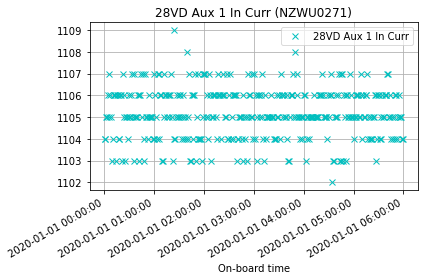

In [13]:
ax = tm.plot_params('NZWU0271')

So we can easily query BOA, and retrieve packets, TCH and other files programmatically!